In [1]:
import os,sys
# os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
import sys,os
sys.path.append(os.path.abspath(os.path.join('..')))

##### Loadind merged_train_data_store and merge_test_data_store

In [3]:
merged_train_data_store = pd.read_csv("../data/merged_train_data_store.csv")
merged_test_data_store = pd.read_csv("../data/merged_test_data_store.csv")

In [4]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,16182.5,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [5]:
merged_train_data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [6]:
merged_test_data_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,16182.5,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [7]:
merged_test_data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

#### State Holiday a = Public Holiday, b = Easter Holiday, c = Christmas 0= None

In [8]:
from scripts.feature_engineering import replace_char_state_holiday

In [9]:
merged_train_data_store['StateHoliday'] = merged_train_data_store['StateHoliday'].apply(replace_char_state_holiday)

##### Assortment level a = basic, b = extra, c = extended


In [10]:
from scripts.feature_engineering import replace_char_assortment

In [11]:
merged_train_data_store['Assortment'] = merged_train_data_store['Assortment'].apply(replace_char_assortment)
merged_train_data_store['Assortment'].value_counts()

Assortment
basic       537445
extended    471470
extra         8294
Name: count, dtype: int64

In [12]:
merged_train_data_store['Date'] = pd.to_datetime(merged_train_data_store['Date'])

In [13]:
from scripts.feature_engineering import create_date_features

In [14]:
create_date_features(merged_train_data_store)

2025-01-03 14:10:20,361 - INFO - Creating date features.
2025-01-03 14:10:20,361 - INFO - Creating date features.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017205,1112,2,2013-01-01,0.0,0,0,0,Public Holiday,1,c,...,2006.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017206,1113,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017207,1114,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0


In [15]:
merged_train_data_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend'],
      dtype='object')

##### Distribution of promotions in both datasets

In [16]:
from scripts.feature_engineering import distribution_promotions_in_both_datasets

2025-01-03 14:12:39,243 - INFO - Comparing Promo distribution between train and test datasets.
2025-01-03 14:12:39,243 - INFO - Comparing Promo distribution between train and test datasets.
2025-01-03 14:12:39,331 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 14:12:39,331 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 14:12:39,344 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 14:12:39,344 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings

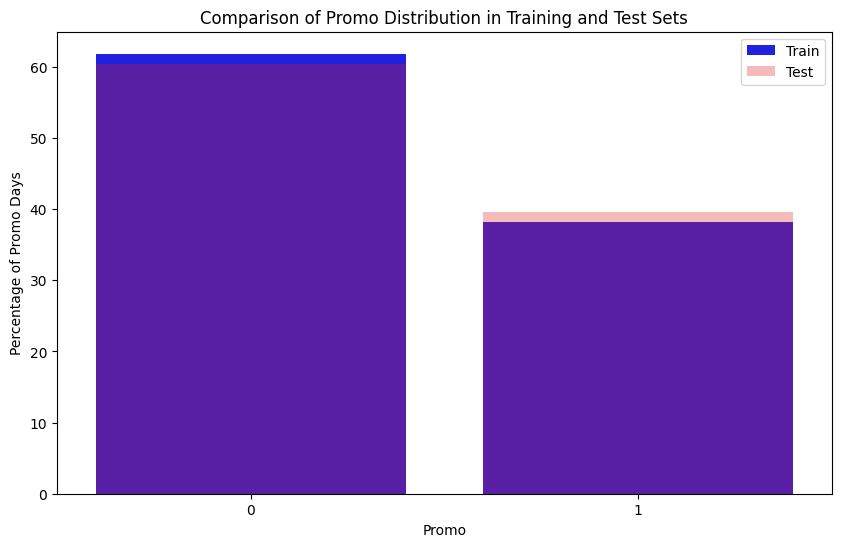

In [17]:
distribution_promotions_in_both_datasets(merged_train_data_store,merged_test_data_store)

#### Check & compare sales behavior before, during, and after holidays

##### Categorize each day based on the holiday type

In [21]:
from scripts.feature_engineering import categorizeEachDayBasedonHolidayType
merged_train_data_store = categorizeEachDayBasedonHolidayType(merged_train_data_store)

2025-01-03 14:22:29,286 - INFO - Categorizing each day based on holiday type.
2025-01-03 14:22:29,286 - INFO - Categorizing each day based on holiday type.


In [22]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


##### Calculate average sales during different periods (Before, During, After)


In [23]:
from scripts.feature_engineering import calculateAverageSalesDuringDifferentPeriods
holiday_sales_behavior = calculateAverageSalesDuringDifferentPeriods(merged_train_data_store)

2025-01-03 14:23:44,601 - INFO - Calculating average sales during different periods.
2025-01-03 14:23:44,601 - INFO - Calculating average sales during different periods.


##### Sales Behavior Before, During, and After Different Holidays

2025-01-03 14:24:53,850 - INFO - Plotting the effect of holidays on sales.
2025-01-03 14:24:53,850 - INFO - Plotting the effect of holidays on sales.


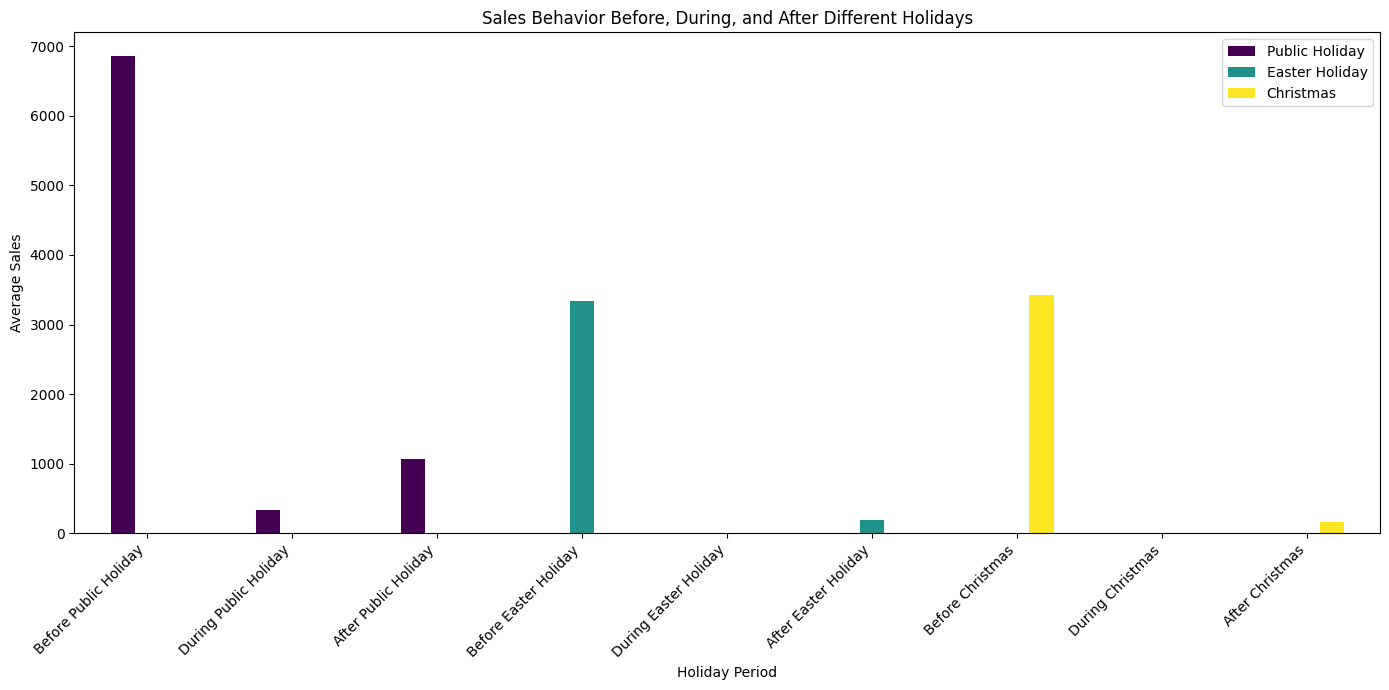

In [24]:
from scripts.feature_engineering import plotEffectOfHolidayOnSales
plotEffectOfHolidayOnSales(holiday_sales_behavior)

In [25]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


##### Sales Over Time on Weekly, Monthly and Yearly


In [26]:
merged_train_data_store.set_index('Date', inplace=True)

In [27]:
merged_train_data_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555,1,1,Non Holiday,1,c,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,2,5,6064.0,625,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,3,5,8314.0,821,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,4,5,13995.0,1485,1,1,Non Holiday,1,c,extended,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,5,5,4822.0,559,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


2025-01-03 14:29:48,432 - INFO - Plotting sales over time by different timeframes.
2025-01-03 14:29:48,432 - INFO - Plotting sales over time by different timeframes.


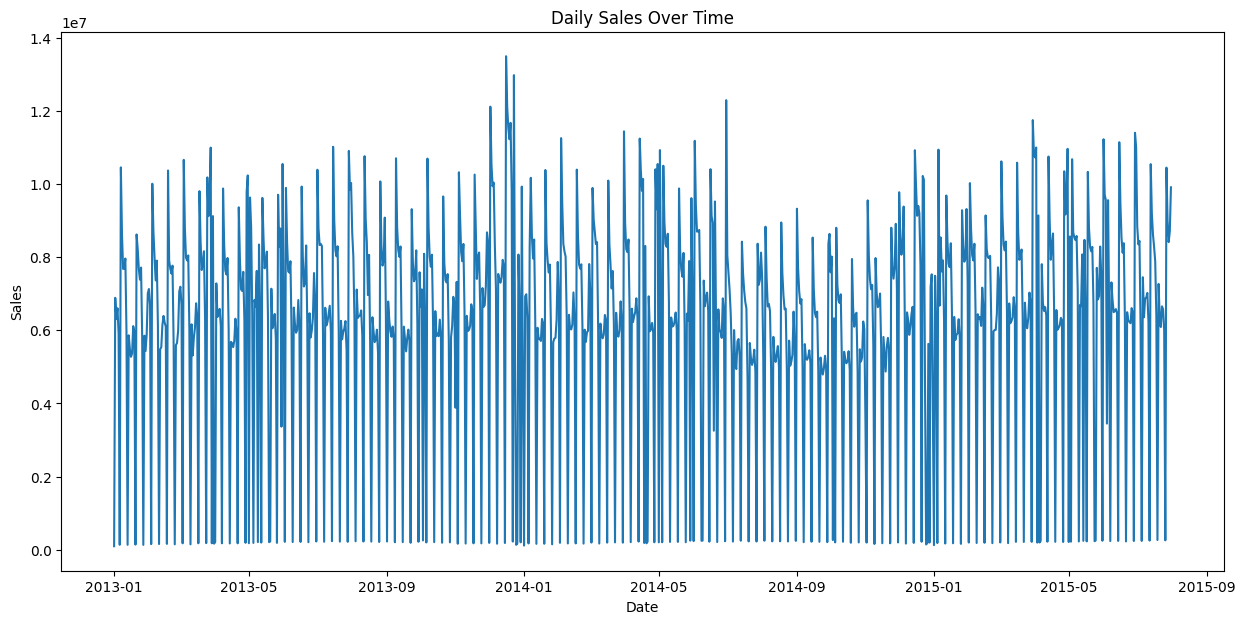

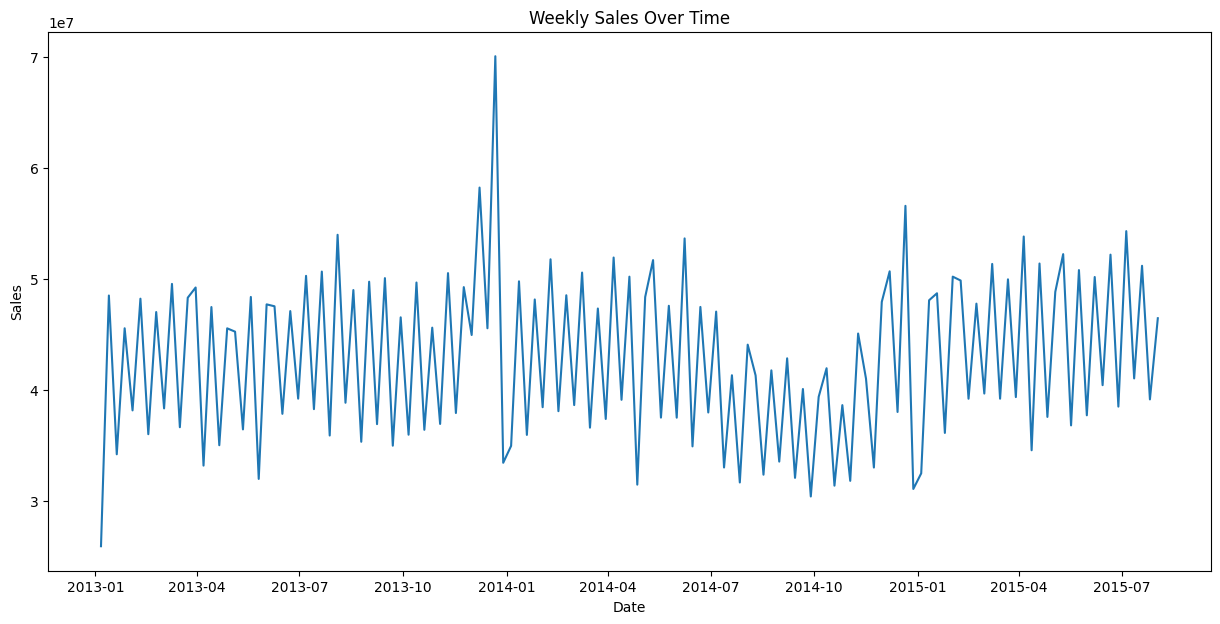

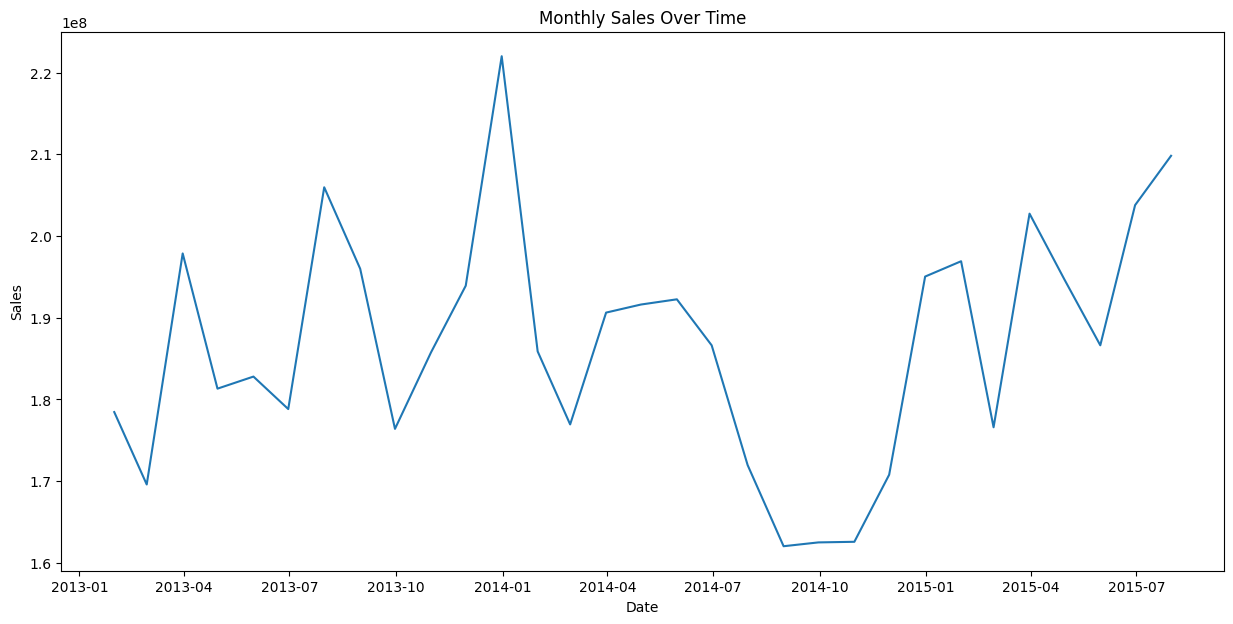

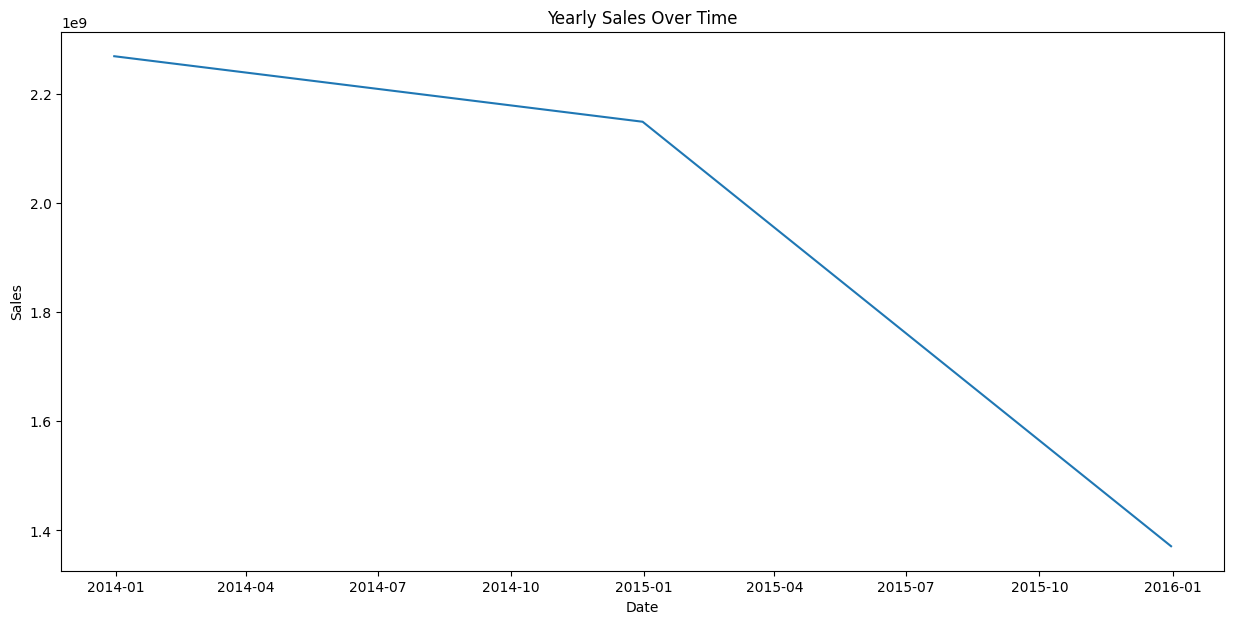

In [28]:
from scripts.feature_engineering import salesOverTime
salesOverTime(merged_train_data_store)

#### Seasonal Decompose

#### Trend:
##### This component shows the long-term movement in the data. It indicates whether sales are generally increasing, decreasing, or remaining stable over time.

#### Seasonal:
##### This component captures the repetitive patterns or fluctuations that occur at regular intervals (e.g., monthly, quarterly). It reveals how sales vary throughout the year, highlighting any seasonal effects.

#### Residual (or Irregular):
##### This component represents the random noise or leftover variation after removing the trend and seasonal components. It can indicate anomalies or outliers in the data. Overall, the results help in understanding the underlying patterns in the sales data, which can inform business decisions and forecasting efforts.